In [1]:
#Analyzing the Effect of Pit Stop Time Duration on Race Results 

#Sydney Walker, Alana Dawson, Ishana Ram, Deborah Hong 
#Group 1
#QTM 151 - Alejandro Sanchez Becerra
#April 25th, 2023


In [2]:
#Importing Libraries 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import date, time, datetime
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col


In [4]:
pitstops = pd.read_csv("data_raw/pit_stops.csv")
drivers = pd.read_csv("data_raw/drivers.csv")
results = pd.read_csv("data_raw/results.csv")
races = pd.read_csv("data_raw/races.csv")

display()

In [5]:
#British Grand Prix
races_British_grandprix = races.query('name == "British Grand Prix"')
races_British_grandprix.sort_values("year", ascending = True)
display(races_British_grandprix)

#Itlian Grand Prix
races_Australian_grandprix = races.query('name == "Australian Grand Prix"')
races_Australian_grandprix.sort_values("year", ascending = True)
display(races_Australian_grandprix)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
25,26,2008,9,9,British Grand Prix,2008-07-06,12:00:00,http://en.wikipedia.org/wiki/2008_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
43,44,2007,9,9,British Grand Prix,2007-07-08,12:00:00,http://en.wikipedia.org/wiki/2007_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
59,60,2006,8,9,British Grand Prix,2006-06-11,12:00:00,http://en.wikipedia.org/wiki/2006_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
80,81,2005,11,9,British Grand Prix,2005-07-10,14:00:00,http://en.wikipedia.org/wiki/2005_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1006,1019,2019,10,9,British Grand Prix,2019-07-14,13:10:00,http://en.wikipedia.org/wiki/2019_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1021,1034,2020,4,9,British Grand Prix,2020-08-02,13:10:00,http://en.wikipedia.org/wiki/2020_British_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1046,1061,2021,10,9,British Grand Prix,2021-07-18,14:00:00,http://en.wikipedia.org/wiki/2021_British_Gran...,2021-07-16,\N,2021-07-17,\N,\N,\N,2021-07-16,\N,2021-07-17,\N
1066,1083,2022,10,9,British Grand Prix,2022-07-03,14:00:00,http://en.wikipedia.org/wiki/2022_British_Gran...,2022-07-01,12:00:00,2022-07-01,15:00:00,2022-07-02,11:00:00,2022-07-02,14:00:00,\N,\N


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
17,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
35,36,2007,1,1,Australian Grand Prix,2007-03-18,03:00:00,http://en.wikipedia.org/wiki/2007_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
54,55,2006,3,1,Australian Grand Prix,2006-04-02,14:00:00,http://en.wikipedia.org/wiki/2006_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
70,71,2005,1,1,Australian Grand Prix,2005-03-06,14:00:00,http://en.wikipedia.org/wiki/2005_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
89,90,2004,1,1,Australian Grand Prix,2004-03-07,\N,http://en.wikipedia.org/wiki/2004_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
107,108,2003,1,1,Australian Grand Prix,2003-03-09,\N,http://en.wikipedia.org/wiki/2003_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
123,124,2002,1,1,Australian Grand Prix,2002-03-03,\N,http://en.wikipedia.org/wiki/2002_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
140,141,2001,1,1,Australian Grand Prix,2001-03-04,\N,http://en.wikipedia.org/wiki/2001_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
157,158,2000,1,1,Australian Grand Prix,2000-03-12,\N,http://en.wikipedia.org/wiki/2000_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [6]:
#British Grand Prix
sorted_pitstops_British = pitstops.sort_values(by='duration', ascending=False)
pitstops_merge_British = pd.merge(races_British_grandprix,
                          sorted_pitstops_British,
                          on = "raceId",
                          how = "left")
British_grandprix_2011 = (pitstops_merge_British[pitstops_merge_British['year'] == 2011])
display(British_grandprix_2011)

#Australian Grand Prix
sorted_pitstops_Australian = pitstops.sort_values(by='duration', ascending=False)
pitstops_merge_Australian = pd.merge(races_Australian_grandprix,
                          sorted_pitstops_Australian,
                          on = "raceId",
                          how = "left")
Australian_grandprix_2011 = (pitstops_merge_Australian[pitstops_merge_Australian['year'] == 2011])
display(Australian_grandprix_2011)

,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,quali_date,quali_time,sprint_date,sprint_time,driverId,stop,lap,time_y,duration,milliseconds
61,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,814.0,2.0,24.0,13:46:50,45.291,45291.0
62,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,30.0,2.0,16.0,13:33:23,31.751,31751.0
63,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,20.0,2.0,27.0,13:51:10,31.558,31558.0
64,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,155.0,2.0,20.0,13:40:27,31.551,31551.0
65,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,814.0,3.0,26.0,13:50:52,31.471,31471.0
66,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,30.0,1.0,9.0,13:20:38,30.242,30242.0
67,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,816.0,1.0,11.0,13:25:14,28.742,28742.0
68,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,155.0,1.0,11.0,13:24:19,28.448,28448.0
69,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,16.0,3.0,40.0,14:13:32,27.240,27240.0
70,849,2011,9,9,British Grand Prix,2011-07-10,12:00:00,http://en.wikipedia.org/wiki/2011_British_Gran...,\N,\N,...,\N,\N,\N,\N,817.0,2.0,28.0,13:56:23,26.942,26942.0


,raceId,year,round,circuitId,name,date,time_x,url,fp1_date,fp1_time,...,quali_date,quali_time,sprint_date,sprint_time,driverId,stop,lap,time_y,duration,milliseconds
26,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,22.0,2.0,23.0,17:40:45,37.856,37856.0
27,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,153.0,1.0,1.0,17:05:23,26.898,26898.0
28,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,816.0,2.0,38.0,18:06:53,26.446,26446.0
29,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,153.0,3.0,35.0,17:59:45,26.348,26348.0
30,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,22.0,4.0,40.0,18:08:03,26.309,26309.0
31,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,17.0,3.0,41.0,18:07:37,26.230,26230.0
32,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,16.0,1.0,16.0,17:29:08,25.978,25978.0
33,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,808.0,2.0,36.0,17:59:47,25.683,25683.0
34,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,67.0,1.0,15.0,17:27:34,25.342,25342.0
35,841,2011,1,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,...,\N,\N,\N,\N,816.0,1.0,14.0,17:26:50,25.259,25259.0


In [15]:
#British Grand Prix
results_British_grandprix = results.query('raceId == 849')
pitstops_final_British = pd.merge(results_British_grandprix,British_grandprix_2011, on='driverId')
pitstops_final2_British = pitstops_final_British[["driverId","points","stop","duration","milliseconds_y"]]
display(pitstops_final_British)

#Australian Grand Prix
results_Australian_grandprix = results.query('raceId == 841')
pitstops_final_Australian = pd.merge(results_Australian_grandprix,Australian_grandprix_2011, on='driverId')
pitstops_final2_Australian = pitstops_final_Australian[["driverId","points","stop","duration","milliseconds_y"]]
display(pitstops_final_Australian)

,resultId,raceId_x,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time,stop,lap,time_y,duration,milliseconds_y
0,20968,849,4,6,5,3,1,1,1,25.0,...,\N,\N,\N,\N,\N,1.0,12.0,13:25:42,26.566,26566.0
1,20968,849,4,6,5,3,1,1,1,25.0,...,\N,\N,\N,\N,\N,2.0,27.0,13:51:15,23.974,23974.0
2,20968,849,4,6,5,3,1,1,1,25.0,...,\N,\N,\N,\N,\N,3.0,39.0,14:10:50,23.474,23474.0
3,20969,849,20,9,1,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,2.0,27.0,13:51:10,31.558,31558.0
4,20969,849,20,9,1,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,1.0,13.0,13:27:22,24.818,24818.0
5,20969,849,20,9,1,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,3.0,36.0,14:06:13,23.137,23137.0
6,20970,849,17,9,2,1,3,3,3,15.0,...,\N,\N,\N,\N,\N,2.0,26.0,13:49:36,25.490,25490.0
7,20970,849,17,9,2,1,3,3,3,15.0,...,\N,\N,\N,\N,\N,1.0,12.0,13:25:41,23.973,23973.0
8,20970,849,17,9,2,1,3,3,3,15.0,...,\N,\N,\N,\N,\N,3.0,38.0,14:09:30,23.785,23785.0
9,20971,849,1,1,3,10,4,4,4,12.0,...,\N,\N,\N,\N,\N,1.0,12.0,13:25:49,25.100,25100.0


,resultId,raceId_x,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fp3_time,quali_date,quali_time,sprint_date,sprint_time,stop,lap,time_y,duration,milliseconds_y
0,20779,841,20,9,1,1,1,1,1,25.0,...,\N,\N,\N,\N,\N,2.0,36.0,17:59:17,24.036,24036.0
1,20779,841,20,9,1,1,1,1,1,25.0,...,\N,\N,\N,\N,\N,1.0,14.0,17:25:17,22.603,22603.0
2,20780,841,1,1,3,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,1.0,16.0,17:28:24,23.227,23227.0
3,20780,841,1,1,3,2,2,2,2,18.0,...,\N,\N,\N,\N,\N,2.0,36.0,17:59:29,23.199,23199.0
4,20781,841,808,4,10,6,3,3,3,15.0,...,\N,\N,\N,\N,\N,2.0,36.0,17:59:47,25.683,25683.0
5,20781,841,808,4,10,6,3,3,3,15.0,...,\N,\N,\N,\N,\N,1.0,16.0,17:28:39,24.535,24535.0
6,20782,841,4,6,5,5,4,4,4,12.0,...,\N,\N,\N,\N,\N,2.0,27.0,17:46:04,24.733,24733.0
7,20782,841,4,6,5,5,4,4,4,12.0,...,\N,\N,\N,\N,\N,3.0,42.0,18:09:08,24.181,24181.0
8,20782,841,4,6,5,5,4,4,4,12.0,...,\N,\N,\N,\N,\N,1.0,12.0,17:22:34,23.251,23251.0
9,20783,841,17,9,2,3,5,5,5,10.0,...,\N,\N,\N,\N,\N,3.0,41.0,18:07:37,26.230,26230.0


In [8]:
#British Grand Prix
pitstopduration_agg_British = (pitstops_final2_British.groupby(["driverId"])
                       .agg(total_pitstop_duration = ('milliseconds_y', 'sum'),
                        total_points =('points', 'mean'))
                        .sort_values(by = 'total_pitstop_duration', ascending = False))
display(pitstopduration_agg_British)

#Australian Grand Prix
pitstopduration_agg_Australian = (pitstops_final2_Australian.groupby(["driverId"])
                       .agg(total_pitstop_duration = ('milliseconds_y', 'sum'),
                        total_points =('points', 'mean'))
                        .sort_values(by = 'total_pitstop_duration', ascending = False))
display(pitstopduration_agg_Australian)

,total_pitstop_duration,total_points
driverId,,
814,103374.0,0.0
30,86644.0,2.0
20,79513.0,18.0
16,77054.0,0.0
813,74379.0,0.0
4,74014.0,25.0
17,73248.0,15.0
18,72649.0,0.0
1,72505.0,12.0


,total_pitstop_duration,total_points
driverId,,
22,104700.0,0.0
153,77709.0,0.0
13,72437.0,6.0
17,72176.0,10.0
4,72165.0,12.0
18,62851.0,8.0
816,51705.0,0.0
808,50218.0,15.0
16,49849.0,2.0


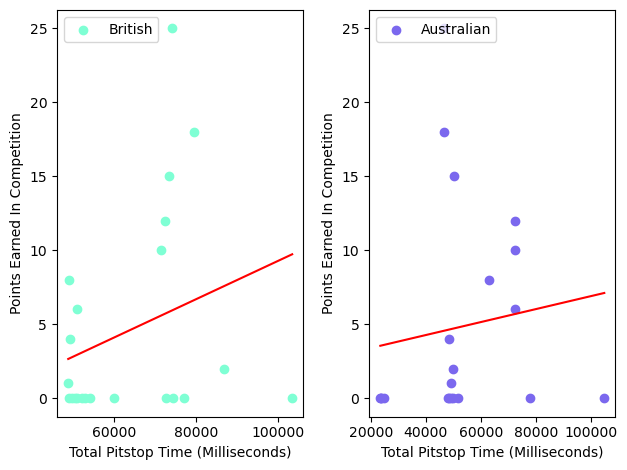

In [9]:
#British Grand Prix
plt.subplot(1, 2, 1)
plt.scatter(x='total_pitstop_duration', y='total_points', data=pitstopduration_agg_British, color = "aquamarine")
plt.xlabel("Total Pitstop Time (Milliseconds)")
plt.ylabel("Points Earned In Competition")
plt.legend(["British"], loc='upper left')
x = pitstopduration_agg_British['total_pitstop_duration']
y = pitstopduration_agg_British['total_points']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


#Australian Grand Prix
plt.subplot(1, 2, 2)
plt.scatter(x='total_pitstop_duration', y='total_points', data=pitstopduration_agg_Australian, color = "mediumslateblue")
plt.xlabel("Total Pitstop Time (Milliseconds)")
plt.ylabel("Points Earned In Competition")
x = pitstopduration_agg_Australian['total_pitstop_duration']
y = pitstopduration_agg_Australian['total_points']
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')


plt.tight_layout()
plt.legend(["Australian"], loc='upper left')
plt.show()


In [10]:
#Regression Analysis 


results_univariateBritish = smf.ols(formula = 'total_points ~ total_pitstop_duration',data =pitstopduration_agg_British ).fit(cov_type= "HC1")
print(summary_col(results_univariateBritish,
                  stars = True))

results_univariateAustralian = smf.ols(formula = 'total_points ~ total_pitstop_duration',data =pitstopduration_agg_Australian ).fit(cov_type= "HC1")
print(summary_col(results_univariateAustralian,
                  stars = True))


                       total_points
-----------------------------------
Intercept              -3.6769     
                       (6.1895)    
total_pitstop_duration 0.0001      
                       (0.0001)    
R-squared              0.0778      
R-squared Adj.         0.0317      
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01

                       total_points
-----------------------------------
Intercept              2.5185      
                       (3.7983)    
total_pitstop_duration 0.0000      
                       (0.0001)    
R-squared              0.0148      
R-squared Adj.         -0.0371     
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01
